<h1>Modern Gradient Descent Optimizer Visualization</h1>

By: Mason Nolan

---

We can view the performance of our optimizers by utilizing each of them on 3 different test functions of various complexity. We will visualize the path taken by each optimizer and keep track of the number of steps taken to converge to a minimum. The three optimizers we will use are:

*   Standard Gradient Descent
*   Gradient Descent with Momentum
*   Adam

We will not use stochastic gradient descent for these optimizers, since we are focused on the algorithm and the "loss function" we are using is strictly defined, so it would be somewhat confusing implement stochastic gradient descent which relies on taking a partition of original data.

The first test function we will use is a [simple paraboloid](https://www.sfu.ca/~ssurjano/sumsqu.html), for which each optimizer should easily find the global minimum, but we will be able to easily compare the convergence speed for simple problems. The global minimum is at $(0,0)$, where $f(x,y)=0$.


\begin{align*}
f(x,y) = x^2 + 2y^2
\end{align*}

The second test function we will use is the famous [Rosenbrock "banana" function](https://www.sfu.ca/~ssurjano/rosen.html), with the most typical parameters. This function is easy to descend into it's major valley, but often difficult to find the actual global minimum quickly. The global minimum is at $(1,1)$, where $f(x,y)=0$.

\begin{align*}
	f(x,y) = 100(y-x)^2+(x-1)^2
\end{align*}

The third and last test function we will use is an [Ackley function](https://www.sfu.ca/~ssurjano/ackley.html). The function has an obvious global maximum when visualized, but the entire function exhibits an "egg carton" pattern, with densely packed local minima throughout the surface of the curve. It is easy for an optimizer to mistakenly terminate at any of these local minimums in each cup in the curve. The global minimum is at $(0,0)$, where $f(x,y)=0$.

\begin{align*}
	f(x,y) = 40-40e^{\left(-\frac{1}{20}\sqrt{\frac{x^2+y^2}{2}}\right)}+e-e^{\left(\frac{\cos(\frac{\pi\cdot x}{2})+\cos(\frac{\pi\cdot y}{2})}{2}\right)}
\end{align*}

Let us visualize each function:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import math
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
# Sum-Squares Function
# Global minimum at (x,y) = (0,0) where f(x,y) = 0.
def sum_squares(x, y):
  return x**2 + 2*y**2

In [ ]:
# Rosenbrock Function
# Global minimum at (x,y)=(1,1) where f(x,y)=0
def rosenbrock(x, y):
  return 100*(y-x**2)**2 + (x-1)**2

In [ ]:
# Ackley Function
# Global minimum at (x,y) = (0,0) where f(x,y) = 0
def ackley(x, y):
  pi = tf.constant(math.pi, dtype=tf.float32)
  euler = tf.constant(math.exp(1), dtype=tf.float32)
  x = tf.cast(x, tf.float32)
  y = tf.cast(y, tf.float32)
  return -40*euler**(-0.05*(0.5*(x**2+y**2))**0.5)-euler**(0.5*(tf.cos(0.5*pi*x)+tf.cos(0.5*pi*y)))+40+euler

In [ ]:
# Constructing the domains for each respective function:
x_ss = np.linspace(-10, 10, 100)
y_ss = np.linspace(-10, 10, 100)
x_ss, y_ss = np.meshgrid(x_ss, y_ss)

x_rosen = np.linspace(-3, 3, 100)
y_rosen = np.linspace(-3, 3, 100)
x_rosen, y_rosen = np.meshgrid(x_rosen, y_rosen)

x_ackley = np.linspace(-25, 25, 100)
y_ackley = np.linspace(-25, 25, 100)
x_ackley, y_ackley = np.meshgrid(x_ackley, y_ackley)

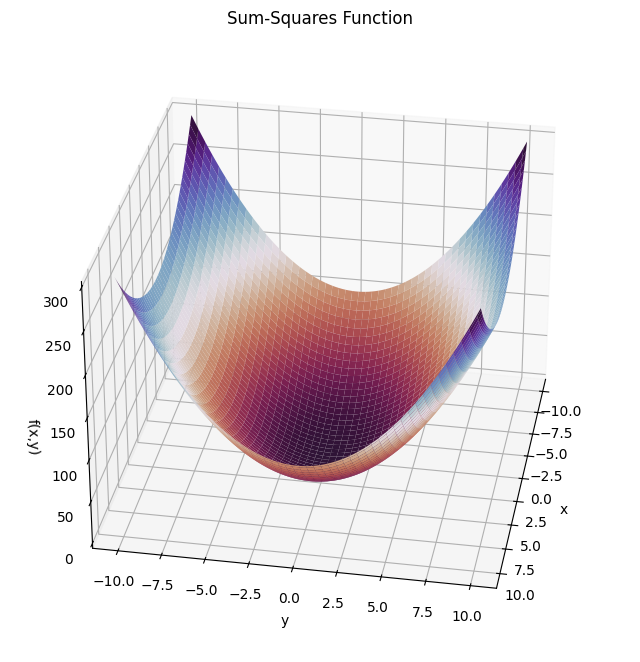

In [ ]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_ss, y_ss, sum_squares(x_ss, y_ss), cmap="twilight_shifted_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.view_init(elev=30, azim=10) # Rotate axis for a better view
plt.title("Sum-Squares Function")
plt.show()

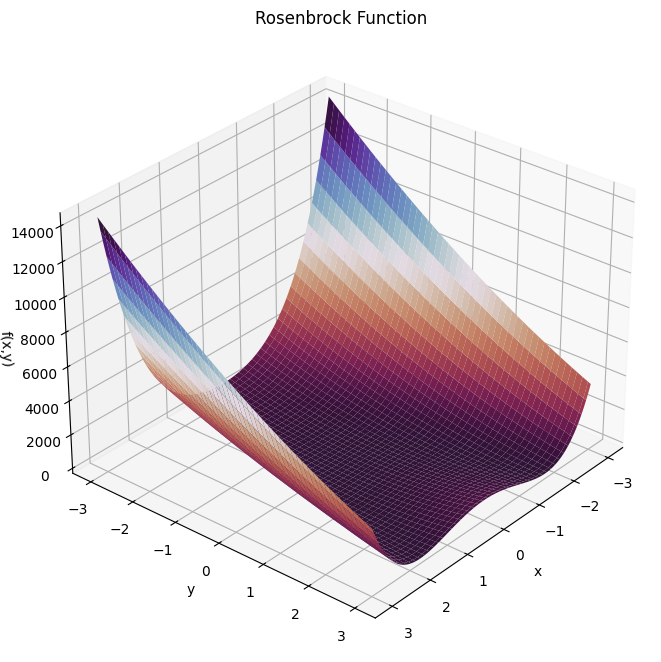

In [ ]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_rosen, y_rosen, rosenbrock(x_rosen, y_rosen), cmap="twilight_shifted_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.view_init(elev=30, azim=40) # Rotate axis for a better view
plt.title("Rosenbrock Function")
plt.show()

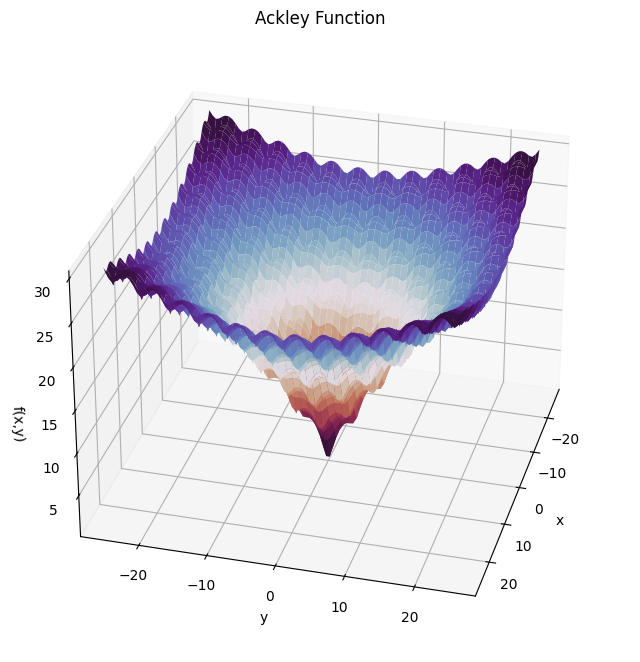

In [ ]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_ackley, y_ackley, ackley(x_ackley, y_ackley), cmap="twilight_shifted_r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.view_init(elev=30, azim=15) # Rotate axis for a better view
plt.title("Ackley Function")
plt.show()

# Optimizer Visualization

With our test functions defined, we can begin our visualizations and analyze the results.

## Sum-Squares

In [ ]:
def plotter(f, x_initial, y_initial, x_vals, y_vals, rotateup, rotateside, max_steps, threshold):
    for optimizer in optimizers:
      optimizer_name = optimizer
      optimizing = optimizers.get(optimizer)
      x_var = tf.Variable(x_initial, dtype=tf.float32)
      y_var = tf.Variable(y_initial, dtype=tf.float32)
      path_x = [x_var.numpy()]
      path_y = [y_var.numpy()]
      path_z = [f(x_var, y_var).numpy()]
      steps = 0
      while steps < (max_steps+1):
          steps = steps+1
          with tf.GradientTape() as tape:
              tape.watch(x_var)
              tape.watch(y_var)
              loss = f(x_var, y_var)
          grads = tape.gradient(loss, [x_var, y_var]) # Gets the gradient at the current point of the function
          optimizing.apply_gradients(zip(grads, [x_var, y_var]))

          # Updating the path
          path_x.append(x_var.numpy())
          path_y.append(y_var.numpy())
          path_z.append(loss.numpy())

          if abs(f(path_x[-1], path_y[-1])-f(path_x[-2], path_y[-2])) < threshold: # This is the difference in f between two steps. If it is less than our provided target error, we stop.
            print(f"{optimizer_name} converged in {steps} steps.")
            print(f"Minimum value obtained after {steps} steps:   f({x_var.numpy():.5f}, {y_var.numpy():.5f}) = {loss.numpy():.16f}")
            plot_optimizer_path(optimizer_name, path_x, path_y, path_z, x_vals, y_vals, f, rotateup, rotateside)
            break

          if steps==max_steps: # This is if we do not converge in a reasonable amount of steps, with a consideration for computation time.
            print(f"The {optimizer_name} optimizer did not converge within {max_steps} steps.")
            print(f"Final value obtained after {max_steps} steps:   f({x_var.numpy():.5f}, {y_var.numpy():.5f}) = {loss.numpy():.16f}")
            plot_optimizer_path(optimizer_name, path_x, path_y, path_z, x_vals, y_vals, f, rotateup, rotateside)

In [ ]:
def plot_optimizer_path(optimizer_name, path_x, path_y, path_z, x_vals, y_vals, function, rotateup, rotateside):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(x_vals, y_vals, function(x_vals, y_vals), cmap="twilight_shifted_r", zorder=1, alpha=0.7)

    # Bounding the plot in case the optimizer's path becomes erratic and goes far beyond the surface plot
    xmin, xmax = x_vals.min(), x_vals.max()
    ymin, ymax = y_vals.min(), y_vals.max()
    zmin, zmax = tf.reduce_min(function(x_vals, y_vals)), tf.reduce_max(function(x_vals, y_vals))

    # Optimizer's path
    path_x = np.clip(path_x, xmin-0.2, xmax+0.2) # We clip the paths to stay within the bounds of our plot, in case the optimizer's path is explosive and goes beyond our plot (just for visualization purposes)
    path_y = np.clip(path_y, ymin-0.2, ymax+0.2)
    path_z = np.clip(path_z, zmin-0.2, zmax+0.2)
    ax.plot(path_x, path_y, path_z, label=f"{optimizer_name} Path", markersize=3, linewidth=1, color="red", marker='o', zorder=2)

    ax.view_init(elev=rotateup, azim=rotateside)


    ax.set_xlim([xmin - 0.2, xmax + 0.2])
    ax.set_ylim([ymin - 0.2, ymax + 0.2])
    ax.set_zlim([zmin - 0.2, zmax + 0.2])

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x,y)")
    ax.set_title(f"{optimizer_name} Optimizer Path ({len(path_x)-1} steps)")
    ax.legend()
    plt.show()

SGD converged in 246 steps.
Minimum value obtained after 246 steps:   f(-0.00390, 0.00000) = 0.0000161564494192


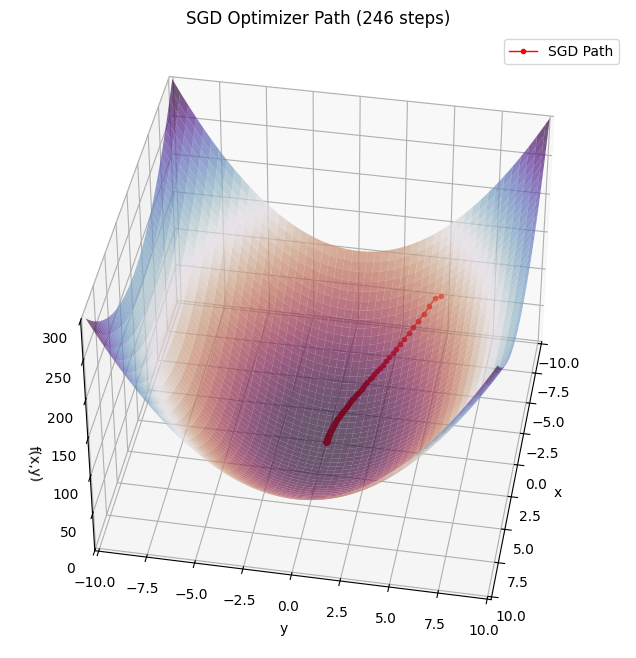

Momentum converged in 128 steps.
Minimum value obtained after 128 steps:   f(0.00764, 0.00591) = 0.0001282354642171


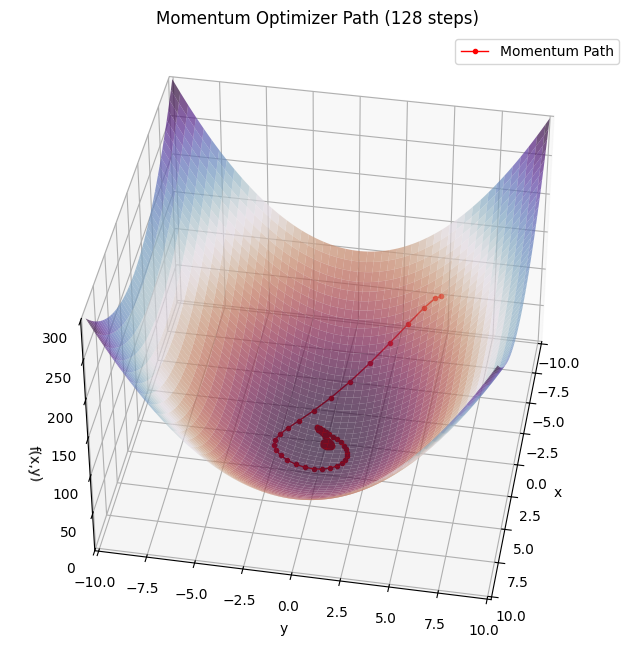

Adam converged in 1381 steps.
Minimum value obtained after 1381 steps:   f(-0.00762, 0.00003) = 0.0000589996525378


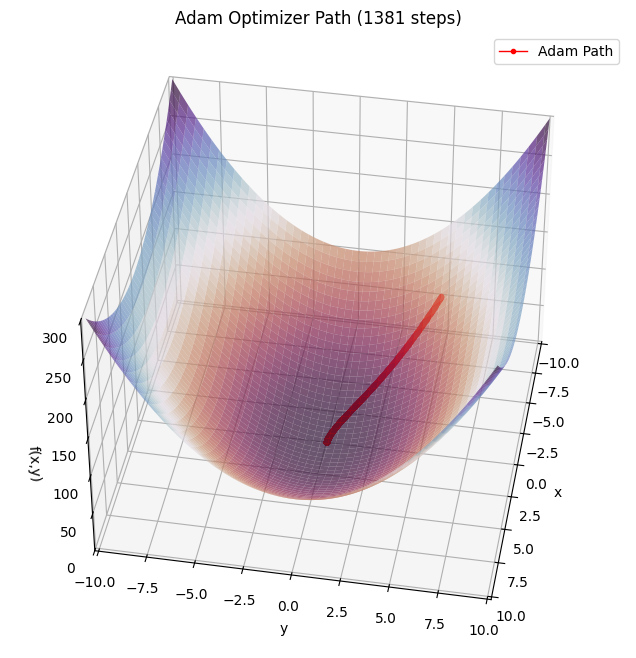

In [ ]:
# Sum-Sqaures
optimizers = {
    "SGD": SGD(learning_rate=0.015, clipnorm=10000),
    "Momentum": SGD(learning_rate=0.015, momentum=0.9, clipnorm=10000),
    "Adam": Adam(learning_rate=0.015, clipnorm=10000)
}

plotter(sum_squares, -7, 5, x_ss, y_ss, 40, 10, 10000, 10**-6)

As predicted, each optimizer trivially reached the global minimum of this function. We chose a very low learning rate (which is $t$ in each optimizer's formulae) for each optimizer to exaggerate the number of steps for each optimizer to more easily compare the convergence speeds. In reality, each of these optimizers can converge to the minimum in a very small number of steps with a more reasonable learning rate chosen.

We see that the standard gradient descent optimizer takes a slightly curved route, which makes sense since the paraboloid is oblate and therefore steeper on one axis than the other, and the optimizer converges reasonably quickly.

The momentum optimizer effectively showcases the appearance of momentum in action. We see that the path traverses the curve much faster, but the final bit of speed was hard to dilute and resulting in a sort of "circling the drain" effect, where our path taken generally identifies the local minimum but takes a large portion of its steps rocking around the actual minimum before it finally converges. Though this final portion takes a long time to stabilize, the initial convergence speed is so significant that our optimizer stabilizes in nearly half the amount of steps of standard gradient descent.

Lastly, the Adam optimizer took the longest time to converge, taking nearly five times the amount of steps to converge to the minimum than standard gradient descent took to converge. We can conclude that Adam may not be ideal for simple problems, where something like standard gradient descent may be able to capitalize on the simplicity of the problem. Another interesting observation, is that the Adam optimizer actually took approximately the shortest path to get to the optimizer, where as gradient descent and momentum descent took more curved paths due to the oblateness of the function. This is a bit subtle to see, but it does highlight the internal efficiency of Adam.

## Rosenbrock

SGD converged in 4222 steps.
Minimum value obtained after 4222 steps:   f(0.89733, 0.80476) = 0.0105701470747590


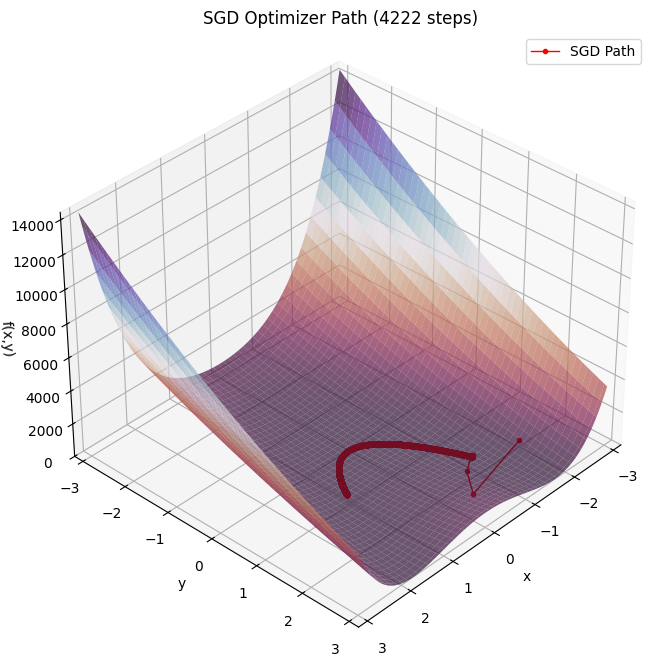

Momentum converged in 586 steps.
Minimum value obtained after 586 steps:   f(0.96642, 0.93384) = 0.0011391917942092


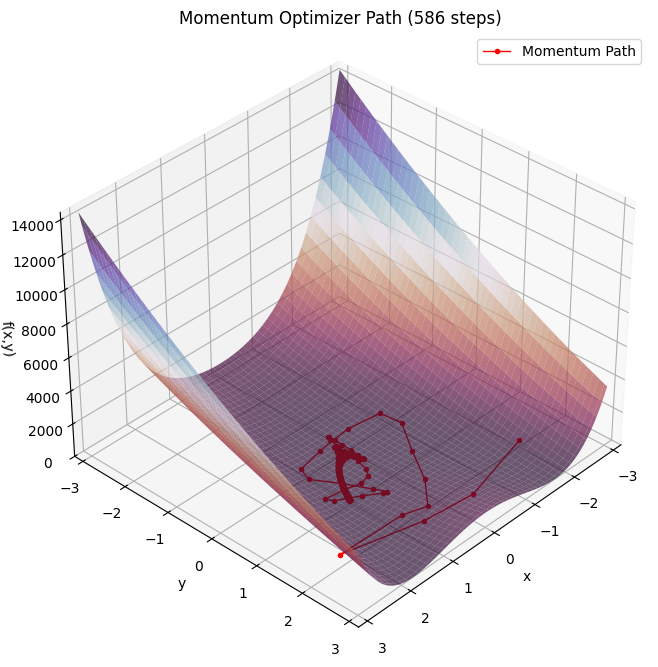

The Adam optimizer did not converge within 10000 steps.
Final value obtained after 10000 steps:   f(-0.88682, 0.79198) = 3.5645527839660645


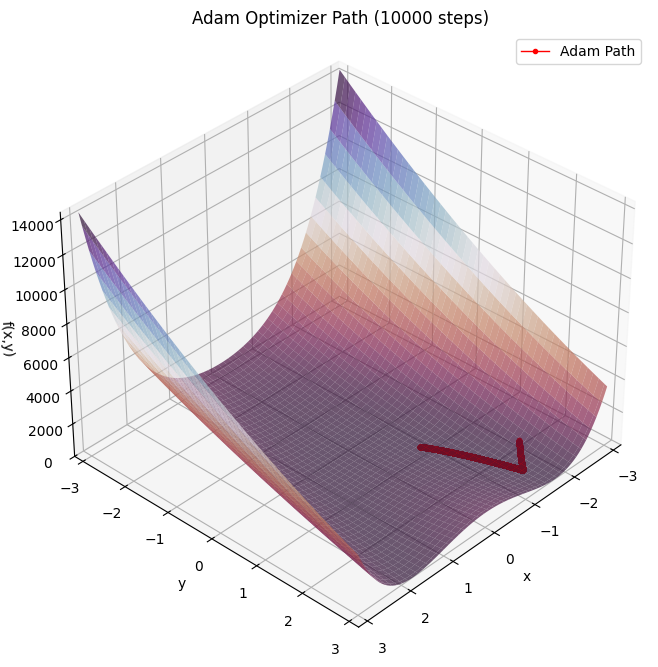

In [ ]:
# Rosenbrock (stable learning rates)
optimizers = {
    "SGD": SGD(learning_rate=0.001, clipnorm=10000),
    "Momentum": SGD(learning_rate=0.001, momentum=0.9, clipnorm=10000),
    "Adam": Adam(learning_rate=0.001, clipnorm=10000)
}

plotter(rosenbrock, -2, 2, x_rosen, y_rosen, 35, 43, 10000, 10**-5)

Here, our standard gradient descent optimizer did manage to converge to the global minimum. The optimizer landed in the valley within approximately 4 or 5 steps, but took over 4000 steps to finally converge to the global minimum, showcasing the optimizer's difficulty handling small gradients.

Momentum descent appeared to behave erratically at first, having built up a lot of initial speed and bouncing around the curve, though we see that it is not for naught, and the algorithm manages to land in the valley and converge to the global minimum in nearly one seventh the amount of steps as standard descent.

The Adam optimizer again took charmingly efficient paths, first the most efficient path into the valley, and then travelled along the parabolic "banana" to approach the global minimum. However, the algorithm terminated because it did not reach the global minimum in a reasonable amount of time and steps (though it is clear by the path that it was going to eventually converge).

This and the previous function's example show us that the Adam optimizer may take an impractical amount of time to converge, which calls into question why it is considered the de facto optimizer for machine learning. We should note that we used a significantly small learning rate for each model, and in reality, the learning rate for these optimizers are often taken much larger for practicality reasons. Observe what happens when we take an unusually large learning rate (learning rates greater than 0.5 are rarely chosen).

The SGD optimizer did not converge within 1000 steps.
Final value obtained after 1000 steps:   f(8122.19971, 1253282.00000) = 91483336.0000000000000000


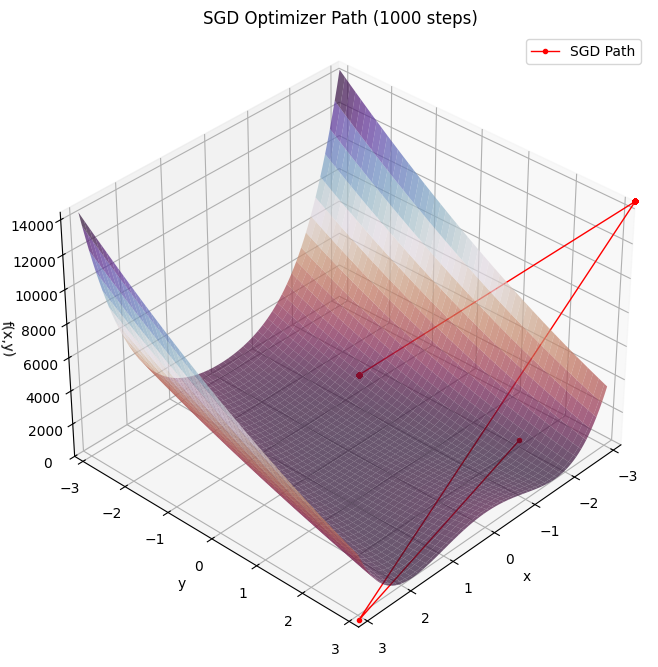

The Momentum optimizer did not converge within 1000 steps.
Final value obtained after 1000 steps:   f(-5278.28516, 33048600.00000) = 3561846202825703424.0000000000000000


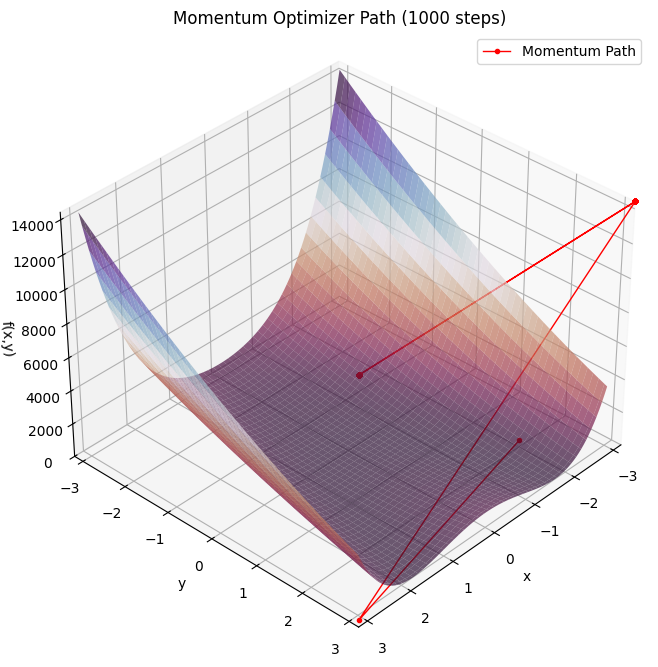

Adam converged in 638 steps.
Minimum value obtained after 638 steps:   f(0.97450, 0.94957) = 0.0006610210402869


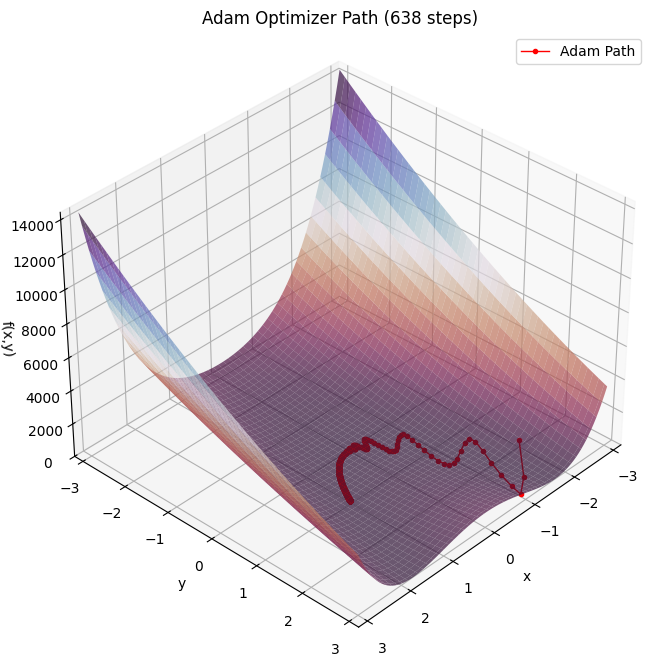

In [ ]:
# Rosenbrock (fast learning rates)
optimizers = {
    "SGD": SGD(learning_rate=0.7, clipnorm=10000),
    "Momentum": SGD(learning_rate=0.7, momentum=0.9, clipnorm=10000),
    "Adam": Adam(learning_rate=0.7, clipnorm=10000)
}

plotter(rosenbrock, -2, 2, x_rosen, y_rosen, 35, 43, 1000, 10**-5)

Now we see why the Adam optimizer is often preferred. With a more generous learning rate, both the gradient descent and momentum descent algorithms quickly were victims to the exploding gradient problem and diverged, yet Adam took a moment to stabilize, but effectively identified the global minimum and did it in a very low amount of steps (less than one fourth the amount of time of standard gradient descent with a stable learning rate). Also notably, both gradient descent and momentum descent diverged with much more fickle learning rates, and 0.7 was chosen just to show that even under extreme initialization, Adam still tends to produce viable results.

As a final note about the Rosenbrock function, we saw in our lecture notes to benefit greatly from optimization using Newton's method and converged in as little as 17 steps in our example code, though we reiterate that Newton's method is difficult to generalize to other loss functions and is often computationally expensive at each step.

## Ackley

Now that we understand the importance of the learning rate initialization, we will not use the same learning rate for each optimizer, but instead whichever learning rate was found to produce the best results within limited testing.

SGD converged in 11 steps.
Minimum value obtained after 11 steps:   f(-11.86880, -15.82583) = 20.2027778625488281


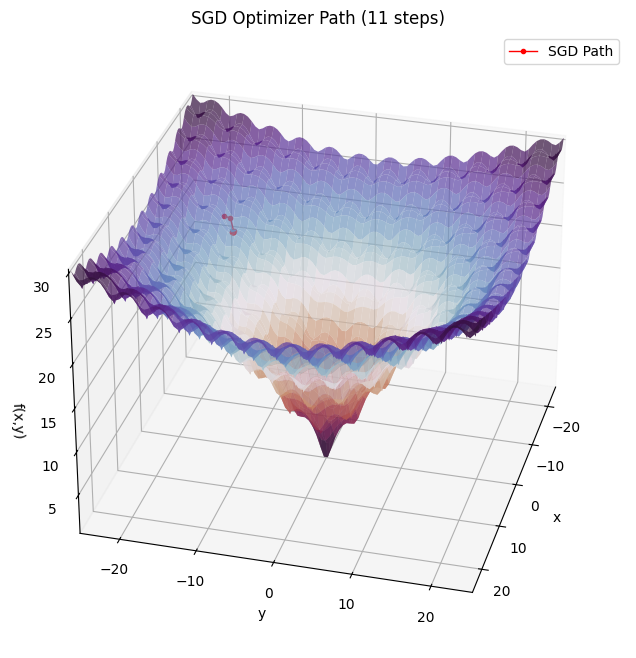

The Momentum optimizer did not converge within 10000 steps.
Final value obtained after 10000 steps:   f(0.00000, 0.19252) = 0.2026910781860352


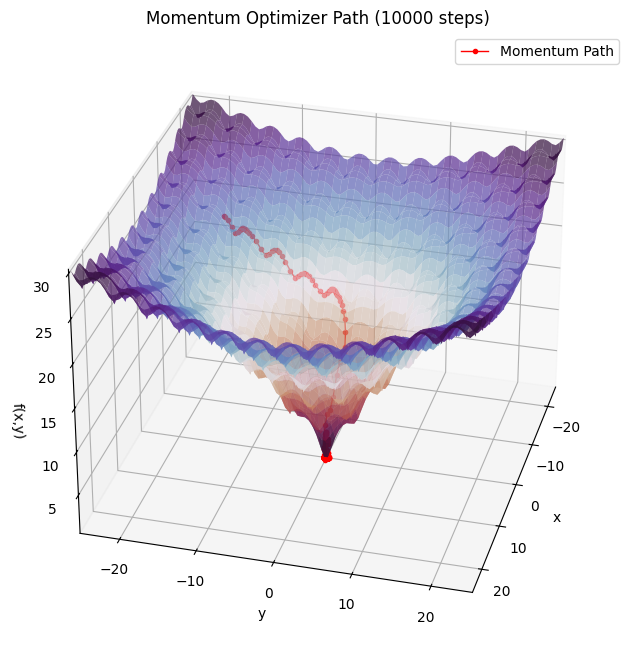

Adam converged in 8332 steps.
Minimum value obtained after 8332 steps:   f(-0.03388, -0.00613) = 0.0506563186645508


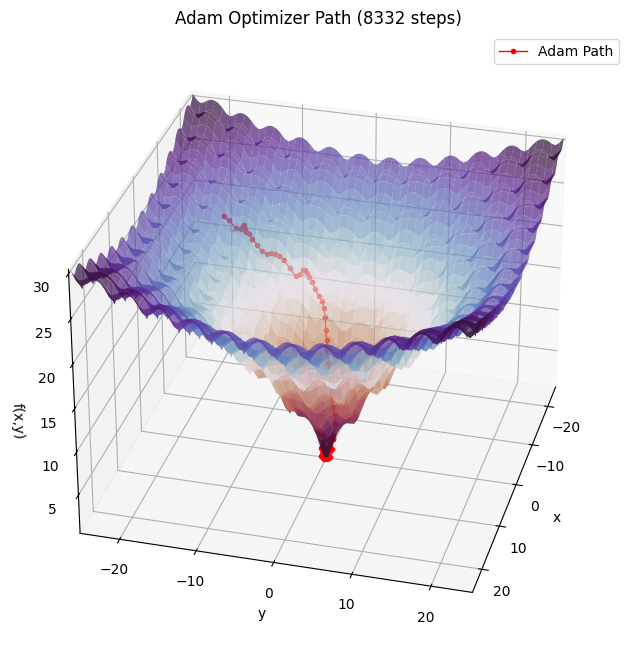

In [ ]:
# Ackley Function
optimizers = {
    "SGD": SGD(learning_rate=0.5, clipnorm=10000),
    "Momentum": SGD(learning_rate=0.1, momentum=0.9, clipnorm=10000),
    "Adam": Adam(learning_rate=0.95, clipnorm=10000)
}

plotter(ackley, -12, -17, x_ackley, y_ackley, 30, 15, 10000, 10**-6)

Standard gradient descent terminated comically fast, and terminated in the first local minima it detected. This highlights the issues with optimizers without momentum applied to a function with many local minima, which occurs frequently in machine learning.

Momentum descent managed to escape the local minima and find the global maximum. However, the algorithm did not terminate in a reasonable amount of steps. The actual path into the global minimum's pit actually appears to have occured fairly quickly based on the size of the steps, but we can see that the optimizer had a severe "circling the drain" effect in this example. We see that our function has a very steep gradient near the global maximum where we exhibit cusp-like behaviour. The optimizer continuously became close to the global maximum but detected a large gradient and added it to the momentum, causing the path to constant rock back and forth about the actual minimum. Even after 10,000 steps, the optimizer was still somewhat far off of the actual value for the $y$-value, since the optimizer was rocking about that axis almost perpetually.

The Adam optimizer had a similar problem, but managed to dilute the explosive gradient inside the cusp and actually managed to stabilize and converge before our code would force us to terminate. Again, Adam took a more direct path and did not travel in as many humps as the momentum optimizer. In this case, Adam even seemed to produce a path that found the global maximum faster than momentum descent since momentum descent had to take extra steps travelling up the bumps throughout the function, while Adam mostly avoided doing this.

# Conclusion

We have seen the pitfalls of the basic gradient descent algorithm before, and we can see how some of the modern adaptations attempt to deal with these pitfalls and even sometimes improving convergence speed without sacrificing computational speed. Stochastic gradient descent deals with large amounts of parameters, momentum deals with plentiful amount of local minima, and the culmination of all these types of developments have led us to jack-of-all-trades optimizers such as Adam.

Adam has demonstarted an ability to consistently produce results, regardless of the complicated function it is tasked with optimizing, and regardless of the potentially poor initialization we have provided it, proving itself as one of the best default optimizers for machine learning tasks when further information about the task at hand is not provided.

Gradient descent is the basis for most machine learning optimization, and we can see some from the fact that simple modifications to the basic algorithm can cause dramatic changes in the performance of the optimizer. Adam, in particular, was only described in 2014 and is fairly new in the grand scheme of optimization. This lends us to believe that there is potentially room for other unique optimization algorithms that are to be found and published, which offers an exciting and optimisitic view for the future of optimization.